Data 
https://www.kaggle.com/datasets/jackdaoud/marketing-data?resource=download

For start include all needing modules in our project
and addition for displaing full columns

DATA LOADING AND INFORMATION

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', None)

In [181]:
marketing_data = pd.read_csv('marketing_data.csv')
marketing_data.head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [182]:
marketing_data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [183]:
marketing_data.describe()

,id,YearBirth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [184]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [185]:
marketing_data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [186]:
marketing_data.Income.describe()

count           2216
unique          1974
top       $7,500.00 
freq              12
Name: Income, dtype: object

DATA CLEANING

In [187]:
marketing_data.Income = marketing_data.Income.replace('[\$,]', '', regex=True).astype(float)
# marketing_data.head(10)

# marketing_data.Income.describe()

marketing_data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in marketing_data.columns]
print(marketing_data.columns)



Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_products', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'response', 'complain', 'country'],
      dtype='object')


In [188]:
marketing_data.income.head(10)

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
5    71691.0
6    63564.0
7    44931.0
8    65324.0
9    65324.0
Name: income, dtype: float64

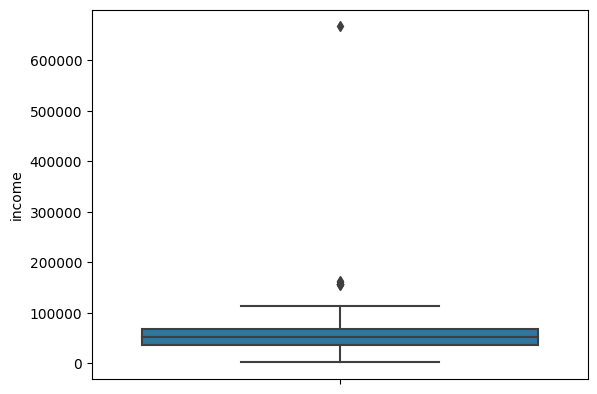

In [189]:
ax = plt.subplot()
sns.boxplot(y='income', data=marketing_data)
plt.show()

<Figure size 640x480 with 0 Axes>

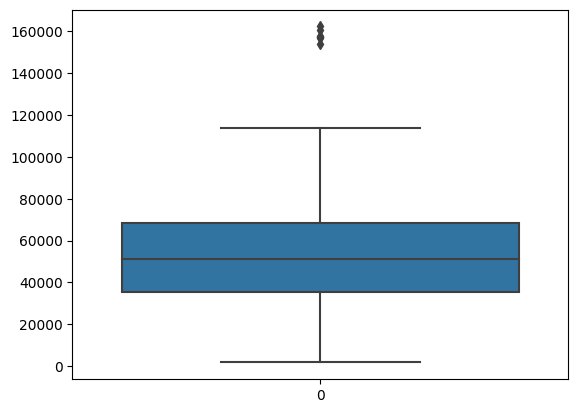

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

In [201]:
marketing_data = marketing_data[marketing_data.income <= 300000]

plt.clf()
plt.figure()
sns.boxplot(marketing_data.income)
plt.show()

marketing_data.income.describe()

In [199]:
marketing_data.income = marketing_data.income.fillna(marketing_data.income.mean())
marketing_data.income.isnull().sum()

0

<Figure size 640x480 with 0 Axes>

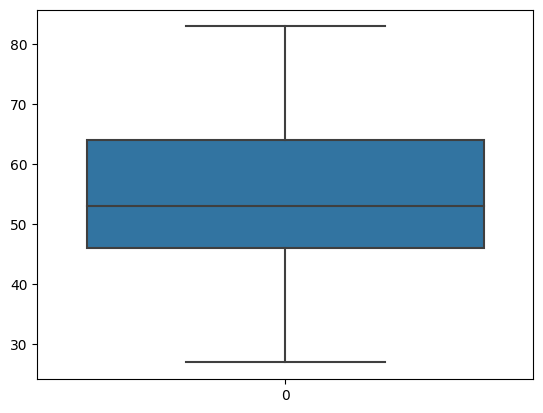

count    2212.000000
mean       54.086347
std        11.701599
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: age, dtype: float64

In [206]:
marketing_data['age'] = 2023 - marketing_data.year_birth
marketing_data.age.head(10)

plt.clf()
plt.figure()
sns.boxplot(marketing_data.age)
plt.show()

marketing_data.age.describe()

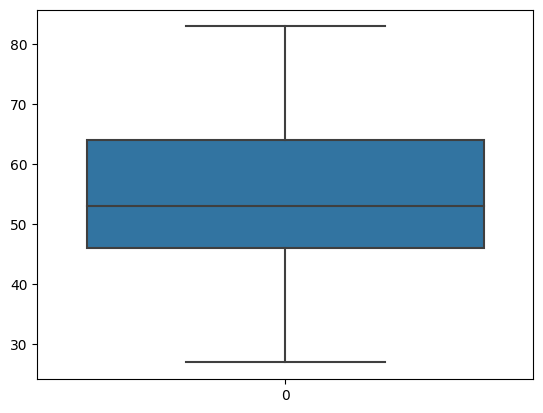

count    2212.000000
mean       54.086347
std        11.701599
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: age, dtype: float64

In [208]:
marketing_data = marketing_data[marketing_data.age < 100]

plt.figure()
sns.boxplot(marketing_data.age)
plt.show()

marketing_data.age.describe()

In [212]:
marketing_data.education.value_counts()


Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: education, dtype: int64

<Figure size 640x480 with 0 Axes>

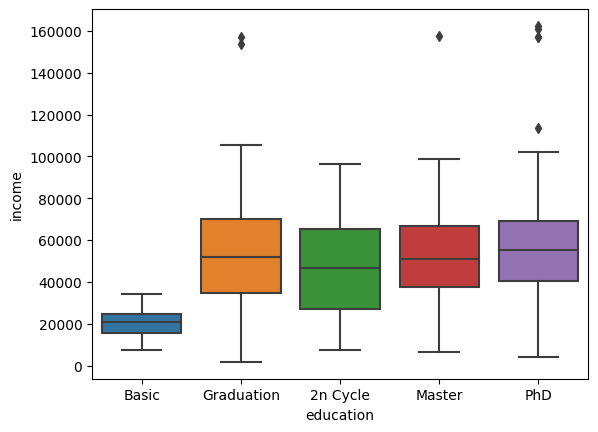

In [213]:

plt.clf()
plt.figure()
sns.boxplot(y='income', x='education', data=marketing_data, order=['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD'])
plt.show()

EXPLORATORY DATA ANALYSIS (EDA)

/var/folders/xs/2vggnzy5647cbgyx17jmsdm40000gn/T/ipykernel_1473/444885302.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  marketing_data.hist(ax = ax);


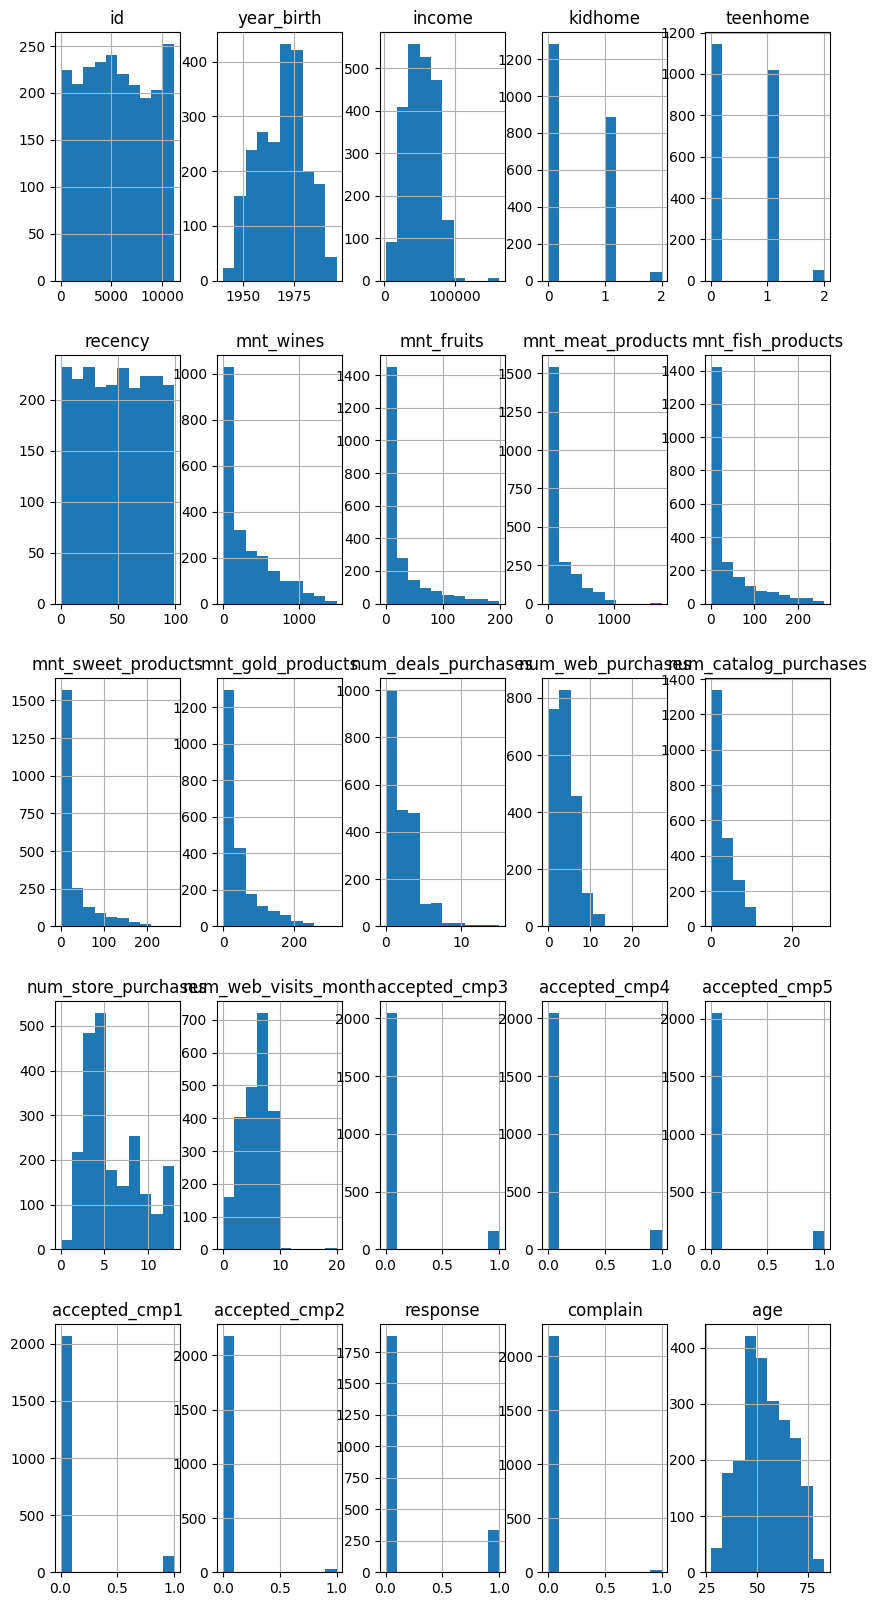

In [216]:
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
marketing_data.hist(ax = ax);

In [217]:
marketing_data.corr()

/var/folders/xs/2vggnzy5647cbgyx17jmsdm40000gn/T/ipykernel_1473/1369349577.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  marketing_data.corr()


,id,year_birth,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_products,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,response,complain,age
id,1.000000,0.005086,0.000905,0.000971,-0.003508,-0.044147,-0.018906,0.010008,-0.003706,-0.022405,-0.004381,-0.008013,-0.040849,-0.017232,-0.000404,-0.011733,-0.008610,-0.035668,-0.023692,-0.004441,-0.017989,-0.014901,-0.021112,0.031839,-0.005086
year_birth,0.005086,1.000000,-0.199977,0.237497,-0.361932,-0.015694,-0.164615,-0.013447,-0.033622,-0.041154,-0.021516,-0.059779,-0.066156,-0.162265,-0.125856,-0.138998,0.120282,0.061097,-0.070035,0.019025,-0.011941,-0.007821,0.020937,-0.004602,-1.000000
income,0.000905,-0.199977,1.000000,-0.514523,0.034565,0.007965,0.688209,0.507354,0.692279,0.520040,0.523599,0.388299,-0.108207,0.459265,0.696589,0.631424,-0.650257,-0.015152,0.219633,0.395569,0.327524,0.104036,0.161387,-0.027900,0.199977
kidhome,0.000971,0.237497,-0.514523,1.000000,-0.039066,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,-0.377843,-0.354922,0.216594,-0.372327,-0.504598,-0.501863,0.447258,0.016135,-0.162111,-0.204582,-0.174261,-0.081911,-0.077901,0.037067,-0.237497
teenhome,-0.003508,-0.361932,0.034565,-0.039066,1.000000,0.014392,0.003945,-0.175905,-0.261134,-0.205235,-0.163107,-0.018579,0.386805,0.162239,-0.112477,0.049212,0.130985,-0.042797,0.038168,-0.190119,-0.145198,-0.015633,-0.154402,0.007746,0.361932
recency,-0.044147,-0.015694,0.007965,0.010623,0.014392,1.000000,0.015981,-0.005257,0.022914,0.000788,0.025244,0.018148,0.002591,-0.005680,0.024197,-0.000460,-0.018965,-0.032361,0.017520,0.000233,-0.021147,-0.001429,-0.200114,0.005713,0.015694
mnt_wines,-0.018906,-0.164615,0.688209,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,0.009117,0.553663,0.634237,0.640219,-0.321616,0.061360,0.373349,0.472889,0.351610,0.206309,0.246320,-0.036420,0.164615
mnt_fruits,0.010008,-0.013447,0.507354,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,-0.134191,0.302301,0.485611,0.459875,-0.417741,0.014644,0.006598,0.208990,0.192417,-0.009924,0.123007,-0.002956,0.013447
mnt_meat_products,-0.003706,-0.033622,0.692279,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,-0.121128,0.306841,0.733787,0.486349,-0.539194,0.018416,0.091677,0.375252,0.313379,0.043549,0.237966,-0.021017,0.033622
mnt_fish_products,-0.022405,-0.041154,0.520040,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,-0.143147,0.299428,0.532241,0.457885,-0.446151,-0.000276,0.016058,0.194793,0.261712,0.002322,0.108135,-0.019098,0.041154


/var/folders/xs/2vggnzy5647cbgyx17jmsdm40000gn/T/ipykernel_1473/795483418.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=marketing_data.corr(),annot=False)


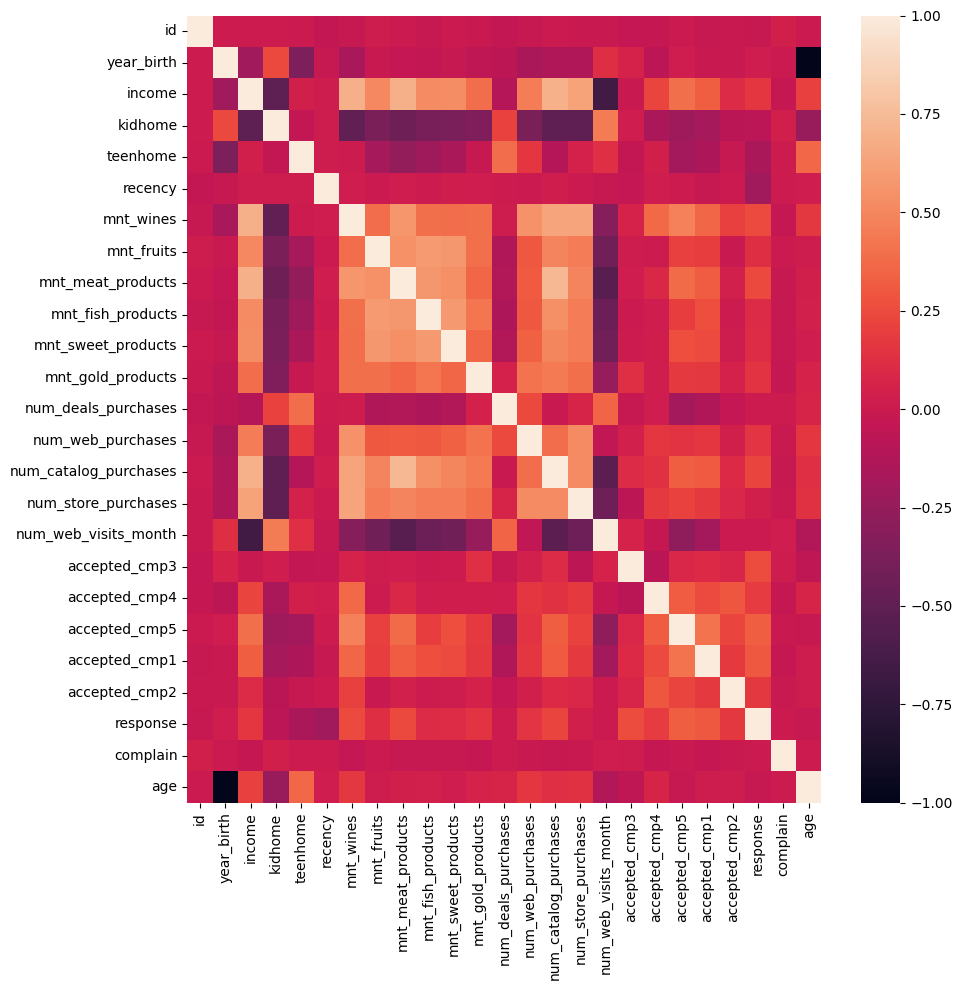

In [223]:
plt.figure(figsize=(10,10))
sns.heatmap(data=marketing_data.corr(),annot=False)
plt.tight_layout()
plt.show()

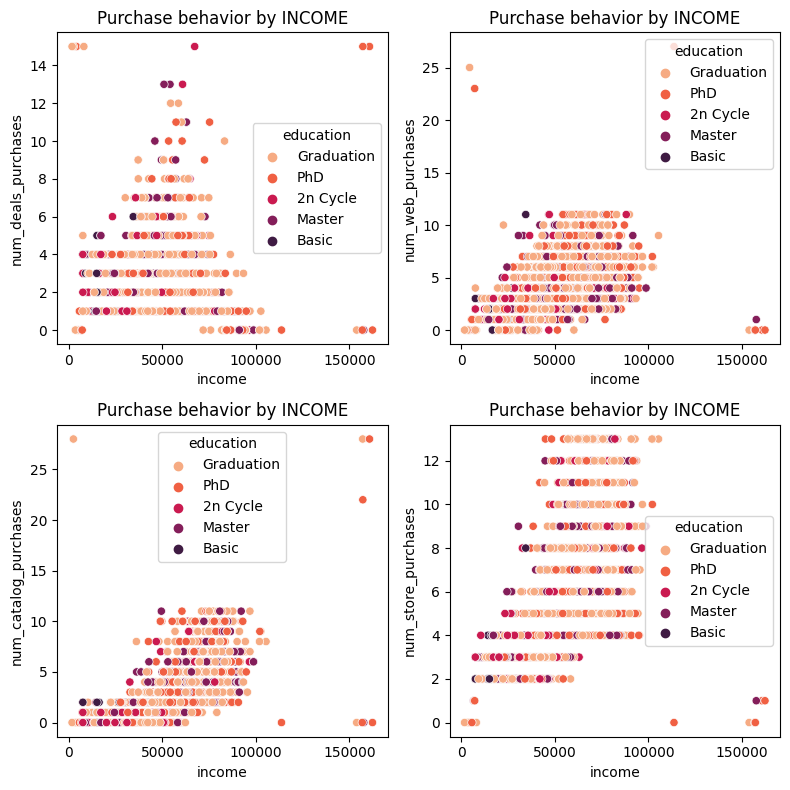

In [228]:
num_minus_corr = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]

plot = 0
plt.figure(figsize=(8,8))

for i in range(len(num_minus_corr)):
    plot += 1
    ax = plt.subplot(2,2,plot)
    sns.scatterplot(x=marketing_data.income, y=marketing_data[num_minus_corr[i]], 
                    hue=marketing_data.education, palette='rocket_r')
    
    plt.title('Purchase behavior by INCOME')

plt.tight_layout()
plt.show()


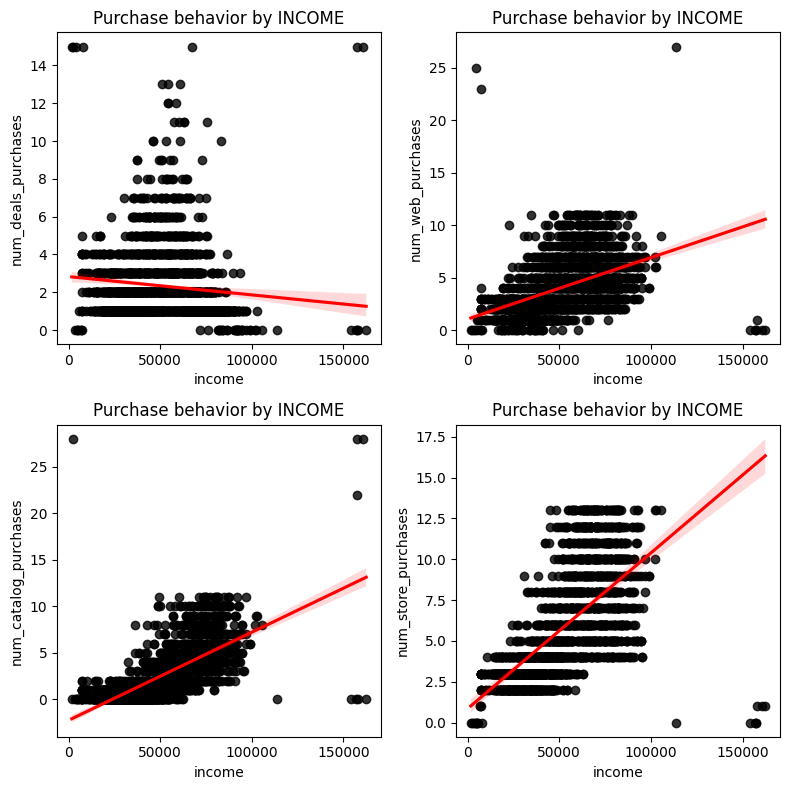

In [232]:
num_minus_corr = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]

plot = 0
plt.figure(figsize=(8,8))

for i in range(len(num_minus_corr)):
    plot += 1
    ax = plt.subplot(2,2,plot)
    sns.regplot(x=marketing_data.income, y=marketing_data[num_minus_corr[i]], 
                    scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
    
    plt.title('Purchase behavior by INCOME')

plt.tight_layout()
plt.show()   

In [236]:
marketing_data['total_purchases'] = marketing_data.num_deals_purchases + marketing_data.num_web_purchases + marketing_data.num_catalog_purchases + marketing_data.num_store_purchases
marketing_data.total_purchases.head(10)

0    15
1    18
2    11
3     4
4     8
5    17
6    28
7     7
8    20
9    20
Name: total_purchases, dtype: int64

<Figure size 640x480 with 0 Axes>

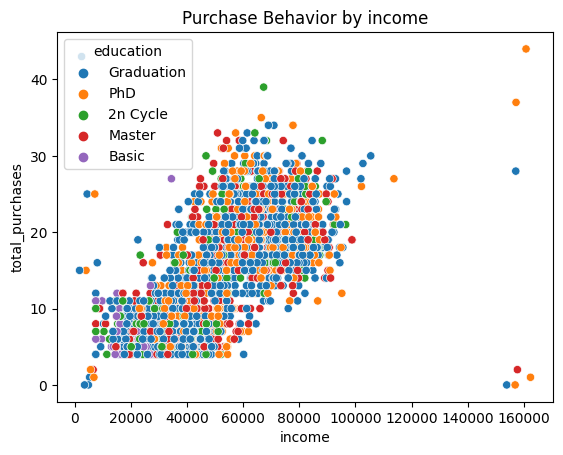

In [237]:
plt.clf()
plt.figure()
sns.scatterplot(y='total_purchases', x='income', data=marketing_data, hue='education')
plt.title('Purchase Behavior by income')
plt.show()

<Figure size 640x480 with 0 Axes>

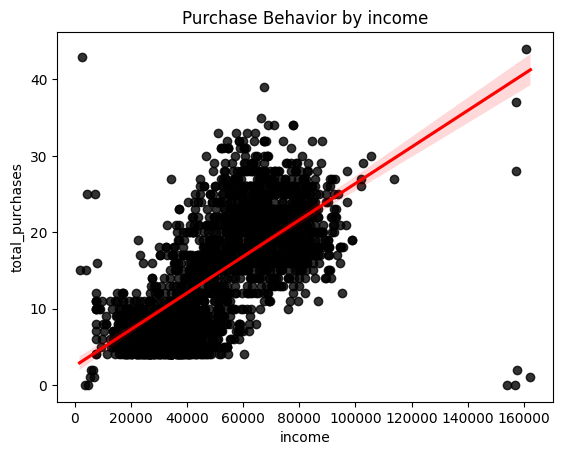

In [239]:
plt.clf()
plt.figure()
sns.regplot(y='total_purchases', x='income', data=marketing_data, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
plt.title('Purchase Behavior by income')
plt.show()

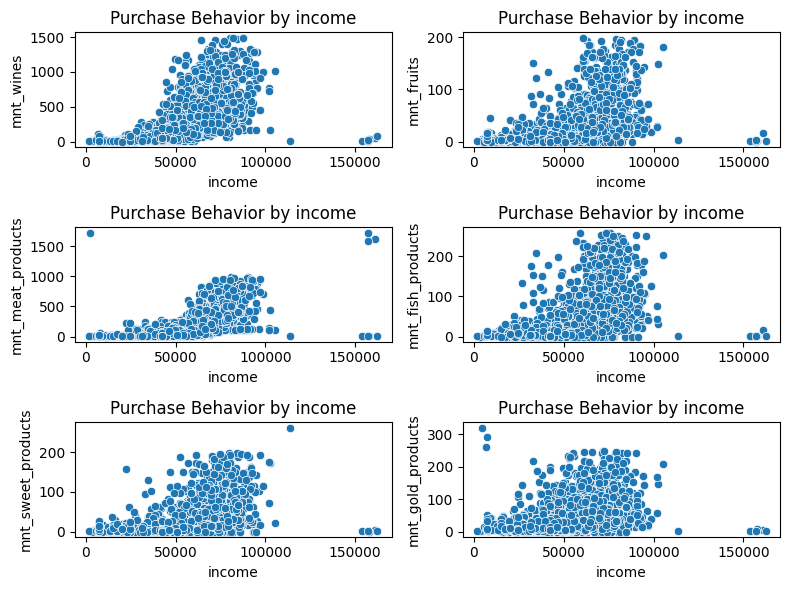

In [240]:
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]

plot = 0

plt.figure(figsize=(8,6))

for i in range(len(amounts_list)):
    plot += 1
    
    ax = plt.subplot(3,2,plot)
    sns.scatterplot(x=marketing_data.income, y=marketing_data[amounts_list[i]])
    plt.title("Purchase Behavior by income")
    
plt.tight_layout()
plt.show()

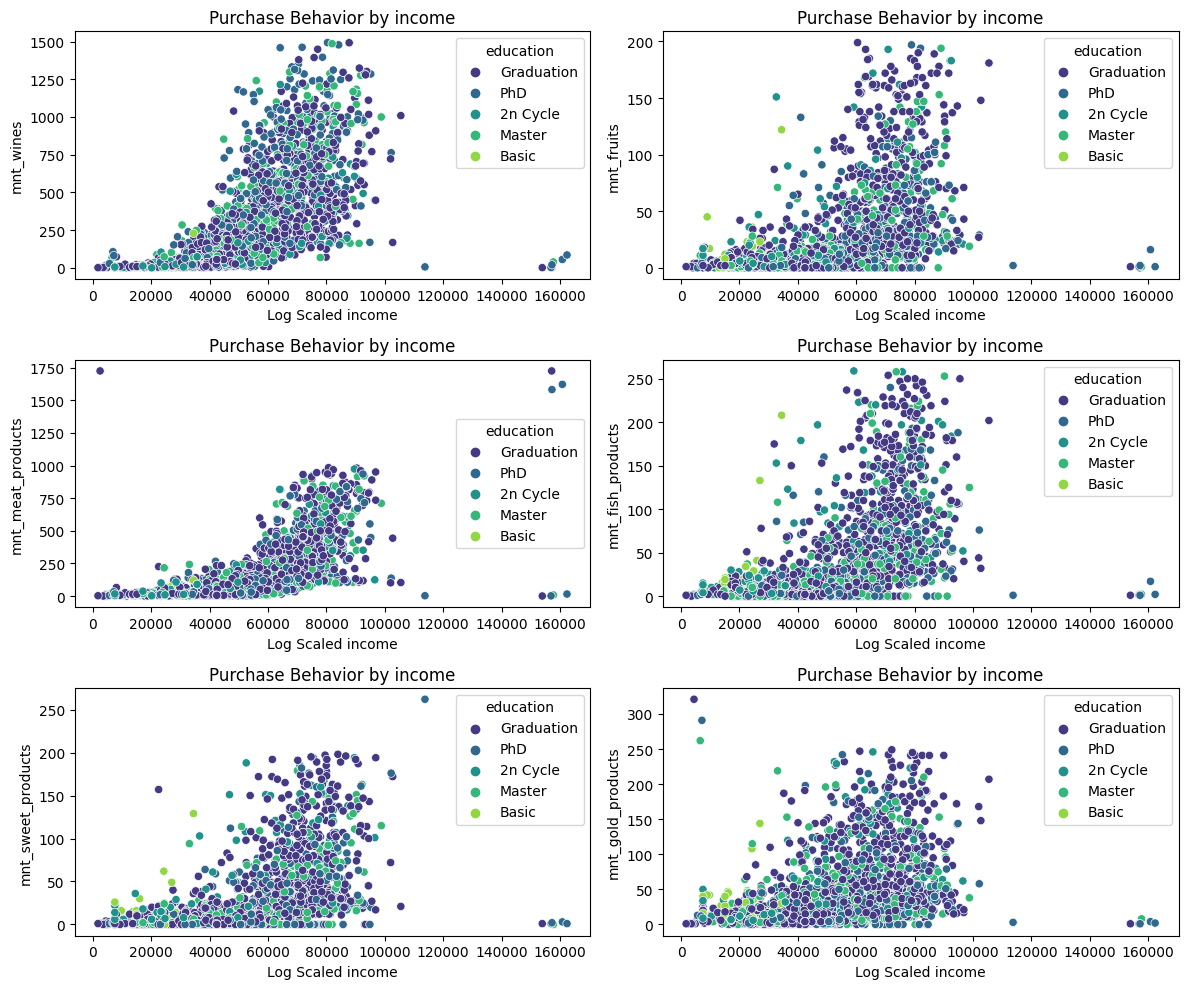

In [242]:
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]

plot = 0
fig = plt.figure(figsize=(12,10))
for i in range(len(amounts_list)):
    plot += 1
    ax = plt.subplot(3, 2, plot)
    sns.scatterplot(y=marketing_data[amounts_list[i]], x=marketing_data["income"], 
                    hue=marketing_data["education"], palette="viridis")
    ax.set_xlabel("Log Scaled income")
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

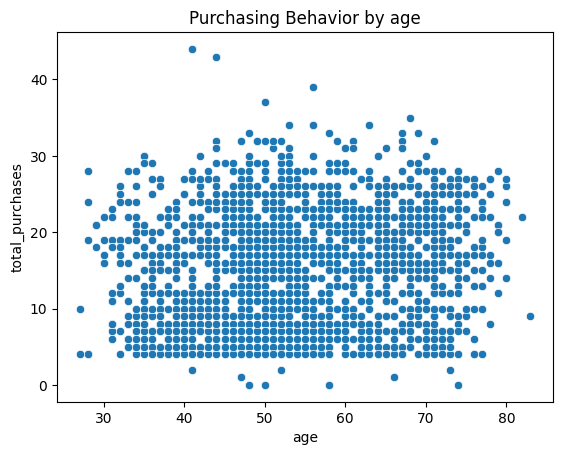

In [244]:
plt.clf()
plt.figure()
sns.scatterplot(y=marketing_data.total_purchases, x=marketing_data.age)
plt.title('Purchasing Behavior by age')
plt.show()

<Figure size 640x480 with 0 Axes>

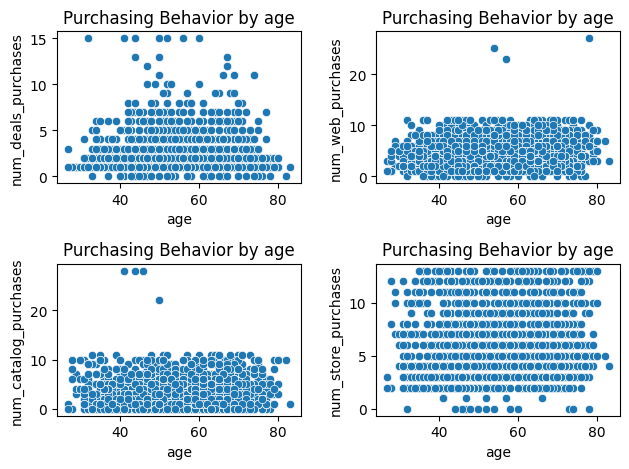

In [246]:
num_minus_corr = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]

plot = 0

plt.clf()
plt.figure()

for i in range(len(num_minus_corr)):
    plot += 1
    
    ax = plt.subplot(2,2, plot)
    sns.scatterplot(y=marketing_data[num_minus_corr[i]], x=marketing_data.age)
    plt.title('Purchasing Behavior by age')
    
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

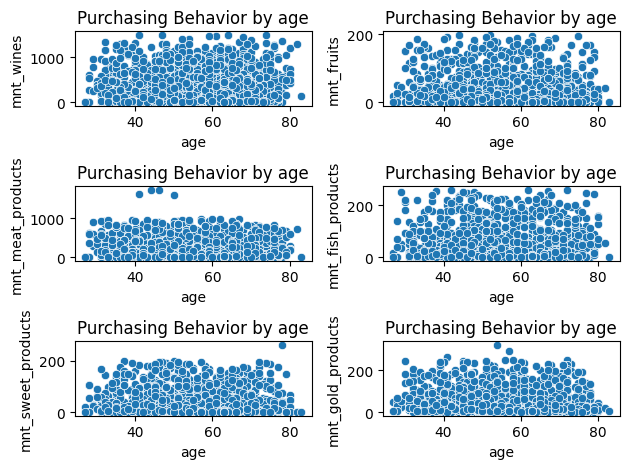

In [248]:
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]

plot = 0

plt.clf()
plt.figure()

for i in range(len(amounts_list)):
    plot += 1
    
    ax = plt.subplot(3,2, plot)
    sns.scatterplot(y=marketing_data[amounts_list[i]], x=marketing_data.age)
    plt.title('Purchasing Behavior by age')
    
plt.tight_layout()
plt.show()

In [263]:
def age_groups(age):
    if 18 <= age <= 35 : 
        return '18 to 35' 
    elif 35 < age <= 50 : 
        return '36 to 50'
    elif 50 < age <= 70 : 
        return '51 to 70'
    else : 
        return '71 and Older'
    
marketing_data['age_group'] = marketing_data.age.apply(age_groups)

marketing_data.age_group.value_counts()



51 to 70        1071
36 to 50         793
71 and Older     229
18 to 35         119
Name: age_group, dtype: int64

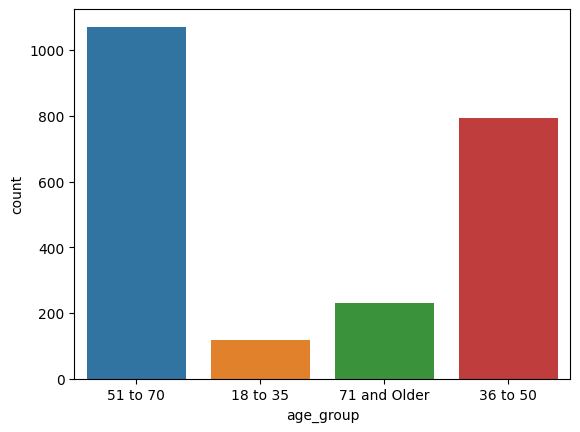

In [264]:
plt.clf()
sns.countplot(data=marketing_data, x="age_group")
plt.show()



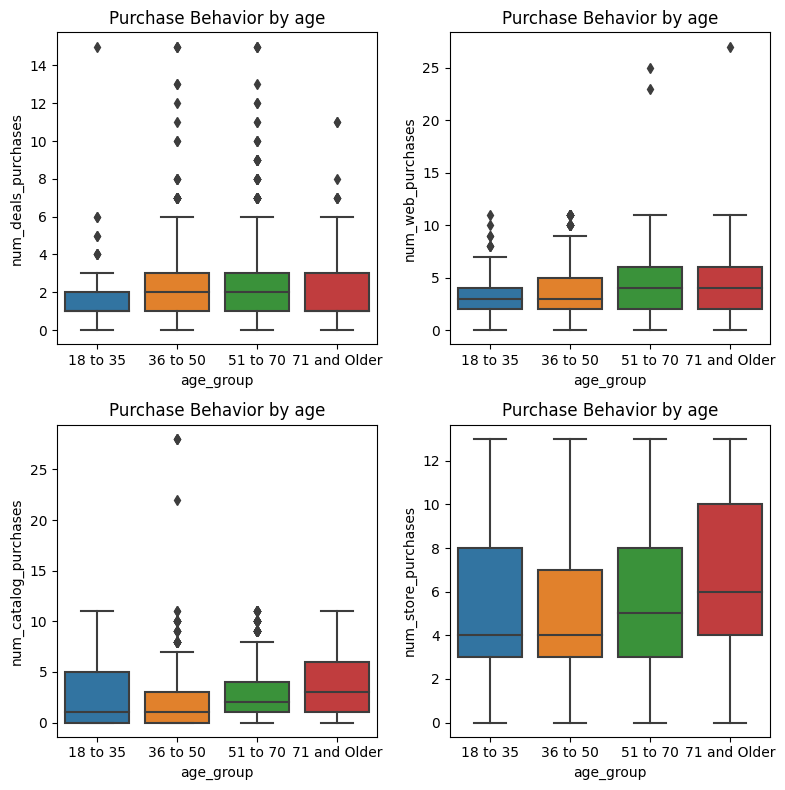

In [265]:
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))
for i in range(len(num_purchases_cols)):
    plot += 1
    ax = plt.subplot(2, 2, plot)
    sns.boxplot(x=marketing_data["age_group"], y= marketing_data[num_purchases_cols[i]], 
                order=["18 to 35", "36 to 50", "51 to 70", "71 and Older"])
    plt.title("Purchase Behavior by age")

plt.tight_layout()
plt.show()

In [266]:
age_plus_amounts = marketing_data.loc[:, ('age', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
'mnt_sweet_products', 'mnt_gold_products')]
bins = [18, 35, 50, 70, 150]
labels = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']

age_plus_amounts['age_group'] = pd.cut(age_plus_amounts.age, bins=bins, labels=labels)
age_plus_amounts = age_plus_amounts.groupby('age_group').sum().reset_index()


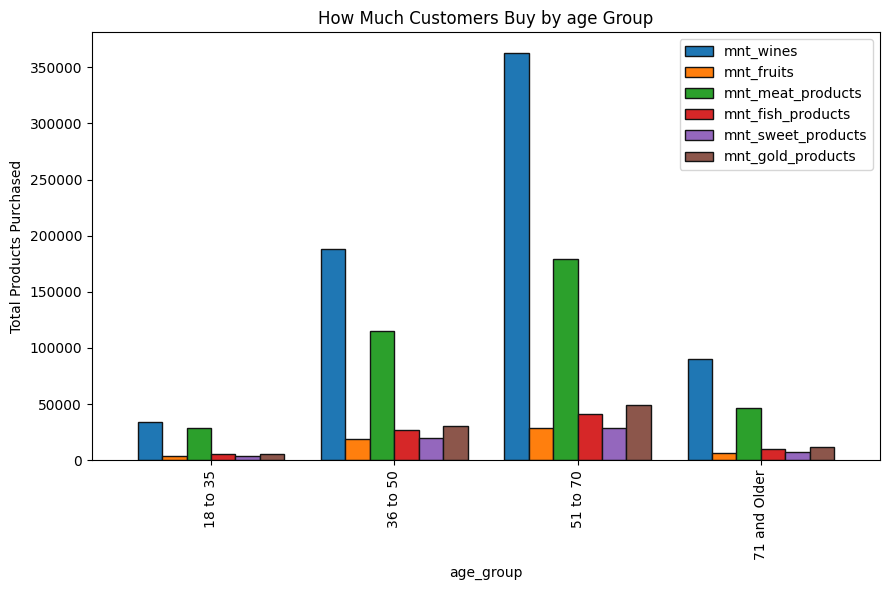

In [267]:
fig, ax = plt.subplots(figsize=(9, 6))

col_products = [
'mnt_wines', 
'mnt_fruits', 
'mnt_meat_products', 
'mnt_fish_products', 
'mnt_sweet_products', 
'mnt_gold_products'
]

# bar graph of amount of items bought in the store grouped by age group
age_plus_amounts.plot(x='age_group', y=col_products, kind='bar', ax=ax,  width=0.8, edgecolor='#131313')
plt.title("How Much Customers Buy by age Group")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

REVIEW 

It has been shown `income` has the strongest relationship with purchase behavior of customers. However, interesting insights about `education` and `age` along with `age_group` have still been noted. These insights would be very helpful to how this store markets deals to their customers and prices items, such as wine since higher income groups tend to dominate alcohol sales. There is also opportunity to increase market to the `18 to 35` and `71 and Older` age groups to drive products sales. 
